In [1]:
from root_pandas import read_root
from glob import glob
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.colors import LogNorm


Welcome to JupyROOT 6.18/00


In [2]:
def trackCut(df):
    ''' Select events with at least one longish track'''
    a = df.groupby('Event').filter(lambda df: df.Track.sum()>10 )
    return a


In [3]:
ht = trackCut(read_root("hit_info_v2_physics.0007.00930.HLT5.f00000.sh.root.root"))

In [4]:
# radii and phi coordinates of CDC wires (for stereo wires: use Z=0)
ht['R'] = np.sqrt(ht.X**2+ht.Y**2)
ht['Phi'] = np.arctan2(ht.Y, ht.X)


In [5]:
# List of event numbers:
E = np.sort(np.array(list(set(ht.Event))))
#ht['BoardId'] = 0

In [6]:
def DrawCDCSuperLayerXY():
    '''Draw boundaries of CDC superlayers'''
    SuperLayerBoundary = [16.8, 25.7, 36.5, 47.6, 58.4, 69.5, 80.2, 91.3, 102.1, 111.1 ]
    ax = plt.gca()
    cols = ["b","r"]
    i = 0
    for r in SuperLayerBoundary:
        circle1 = plt.Circle((0, 0), r, color=cols[i % 2],fill=False)
        ax.add_artist(circle1)
        i += 1

Event =  8
Event =  13
Event =  23
Event =  33
Event =  38
Event =  68
Event =  73
Event =  83
Event =  93
Event =  103


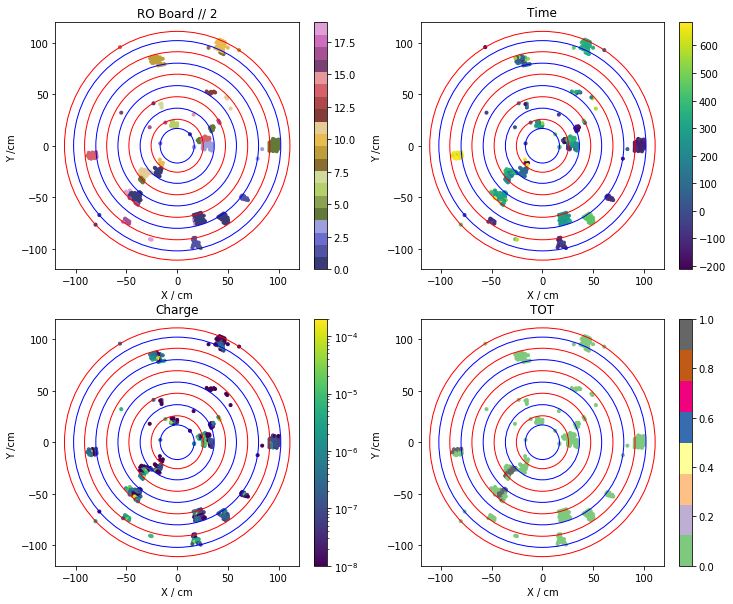

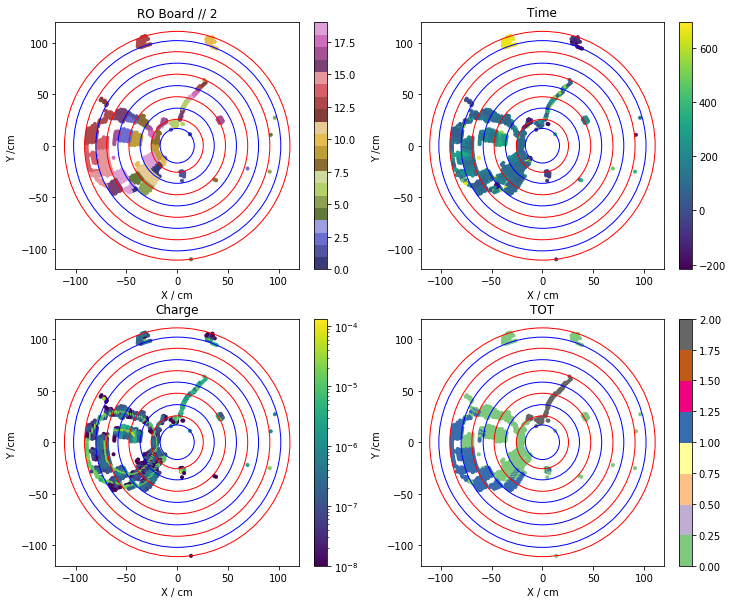

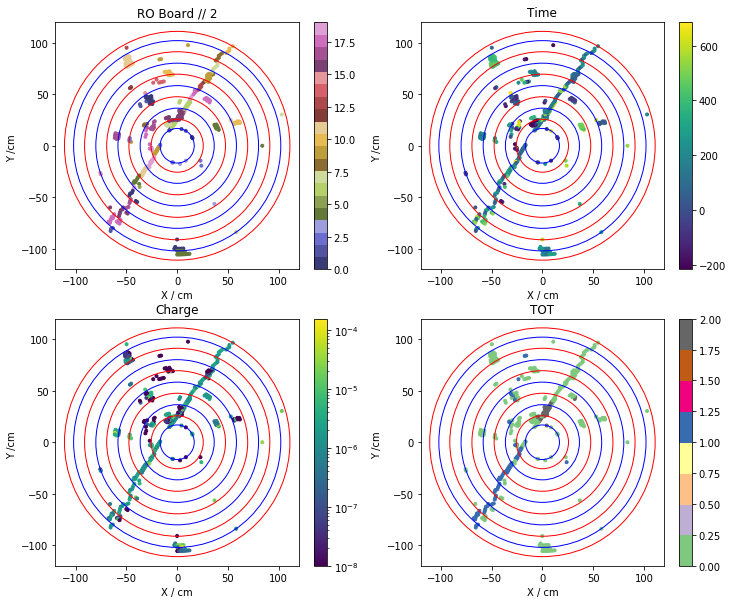

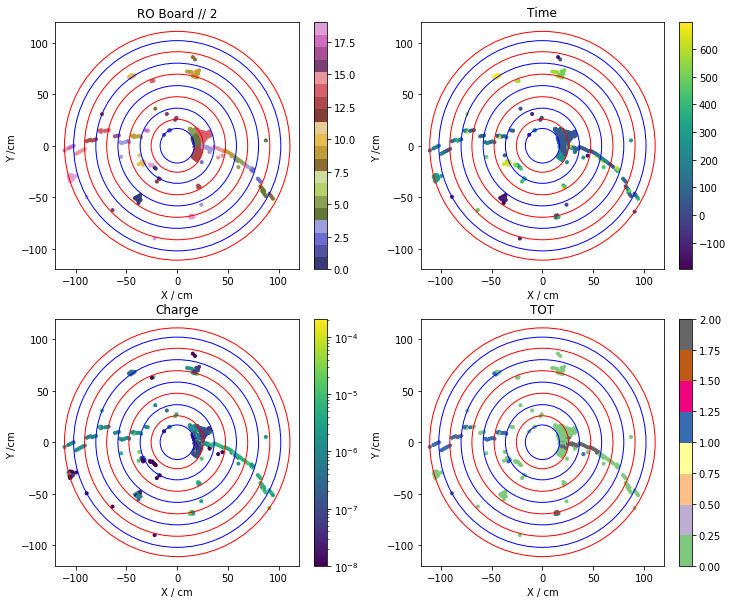

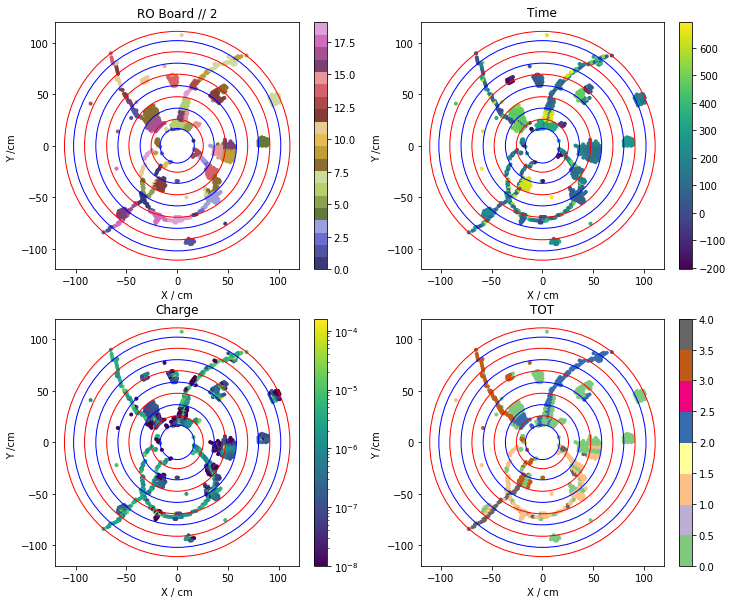

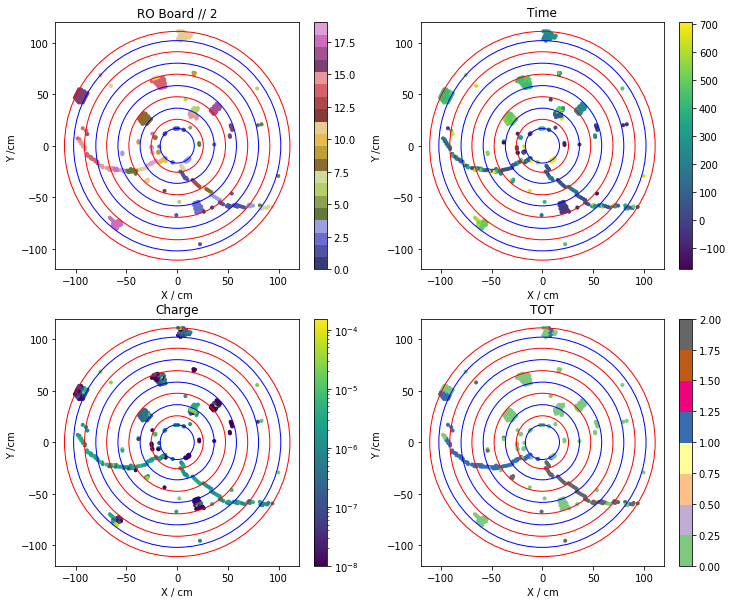

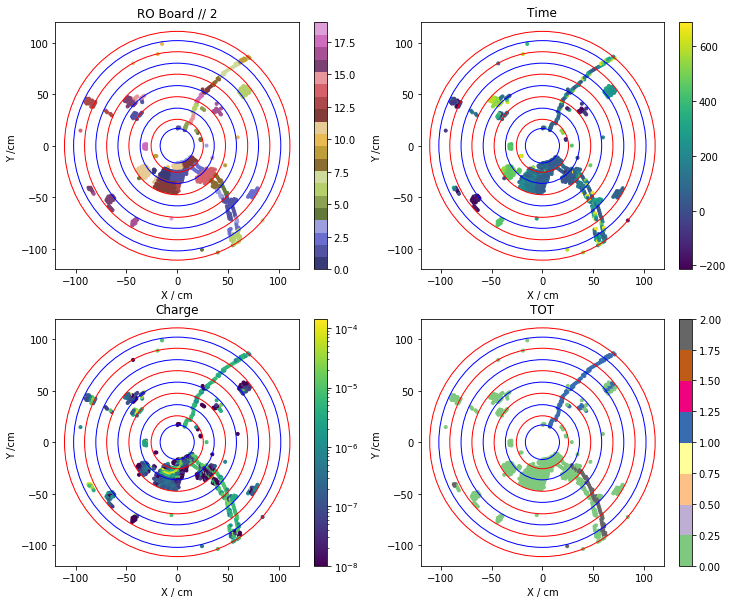

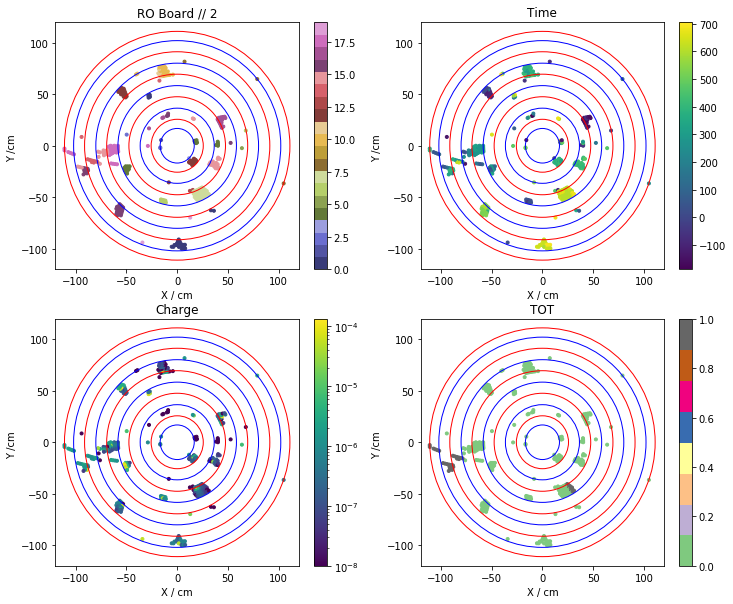

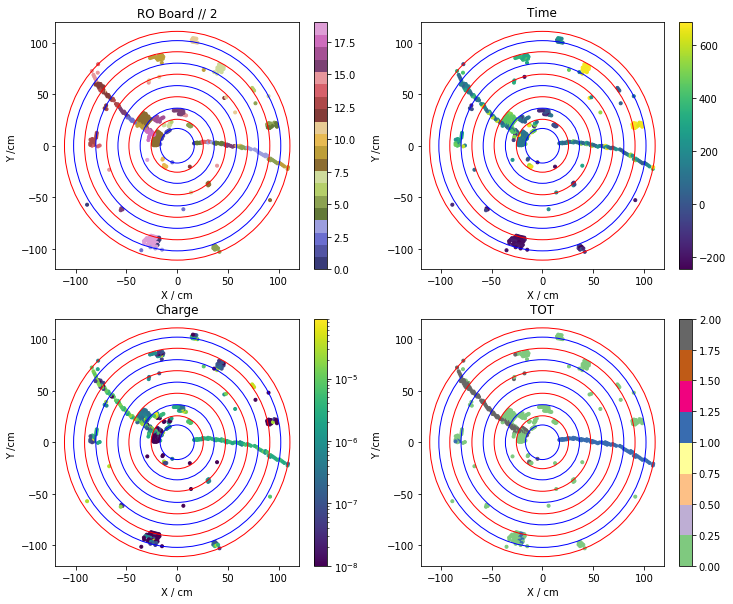

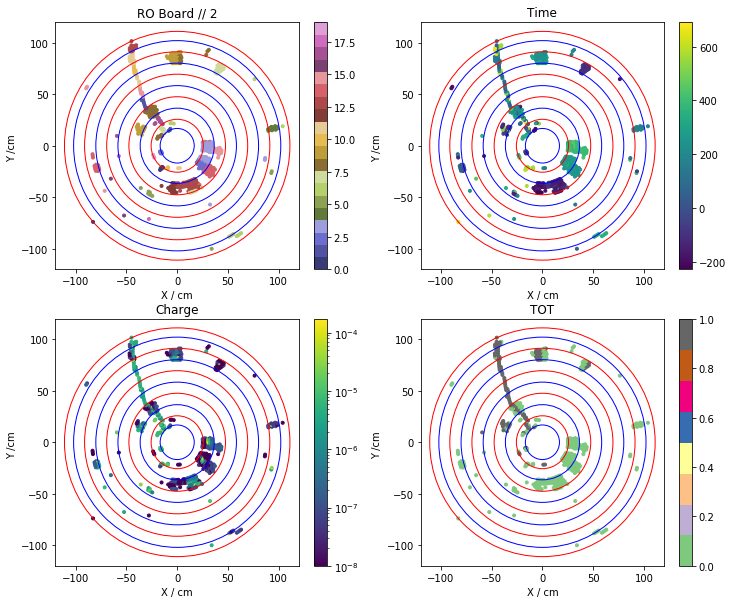

In [7]:
def drawEv(x,y,z,cmap=None,norm=None):
    plt.xlim(-120.,120.)
    plt.ylim(-120.,120.)
    DrawCDCSuperLayerXY()
    #h = plt.hist2d(X,Y,120,[[-120.,120.],[-120.,120.]],norm=LogNorm())
    #plt.scatter(X,Y,c=ht[c].Charge,vmax=0.00005)#,norm=LogNorm())
    #plt.scatter(X,Y,c=ht[c].Time) #,norm=LogNorm())
    plt.scatter(x,y,c=z,  cmap=cmap, marker='.',norm=norm)
    plt.colorbar()
    plt.xlabel("X / cm")
    plt.ylabel("Y /cm ")
    
# ht = ht6e2
pdf = PdfPages("events.pdf")
for ev in E[:10]:
#for ev in ll[40:60]:
    print ("Event = ",ev)
    ccc =  (ht.Event == ev) & (ht.Time>-1000) 
    c2 = ccc # & (ht.bgFlag == 0)  # #  # & (ht.xTalk == 0)  # # 
    c = ccc  #& (ht.Track>0)  # sig # (ht.Charge>0.6e-6)
    c = ccc #& (ht.BoardId // 2 ==77//2)
    X = np.array(ht[c].X)
    Y = np.array(ht[c].Y)
    if len(X)==0:
        continue
    plt.figure(figsize=(12,10))
    plt.subplot(111)
    plt.title("Event = {:d}.format(ev)")
    plt.subplot(221)
    drawEv(X,Y, ht[c].BoardId//2%20,plt.get_cmap('tab20b') )
    plt.title('RO Board // 2')
    plt.subplot(222)
    drawEv(X,Y,ht[c].Time)
    plt.title('Time')
    plt.subplot(223)
    drawEv(X,Y,np.where(ht[c].Charge>0, ht[c].Charge,1.e-8),norm=LogNorm()) 
    plt.title('Charge')
    plt.subplot(224)
    drawEv(X,Y,ht[c].Track ,plt.get_cmap('Accent'))
#    drawEv(X,Y,ht[c].TOT ) #,plt.get_cmap('Accent'))
    plt.title('TOT')
#    plt.savefig("event_x.pdf")
    pdf.savefig()
    plt.savefig("ev_old.png")
pdf.close()